In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sn

In [0]:
from google.colab import files
uploaded = files.upload()

Saving tbl_TNX_CKD_MSC_ML_project22_july_2019.csv to tbl_TNX_CKD_MSC_ML_project22_july_2019.csv


In [0]:
#path = "/content/drive/My Drive/tbl_TNX_CKD_MSC_ML_project22_july_2019.csv"

df = pd.read_csv('tbl_TNX_CKD_MSC_ML_project22_july_2019.csv',sep ='|')

df.head()

,PATIENTID,RACE,YEAR_OF_BIRTH,AGE_AT_DEATH,SEX,DEATHDATE,INDEXDATE,INDEX_EGFRVAL,FIRST_EGFR_DATE,DIALYSIS_DATE,FIRST_DIAG_DATE,LAST_DIAG_DATE,FIRST_PROCEDURE_DATE,LAST_PROCEDURE_DATE,FIRST_MEDICATION_DATE,LAST_MEDICATION_DATE,FIRST_ENCOUNTER_DATE,LAST_ENCOUNTER_DATE,FIRST_LAB_DATE,LAST_LAB_DATE,RENAL_TRANSPLANTHX,YEAR2_EGFR_VALUE,YEAR2_EGFR_DATE,BL_HYPERTENSION,BL_ISCHEMIC_HEART_DISESE,BL_CEREBROVASCULAR_DISEASE,BL_DIABETES,BL_ATERIAL_FIBRILATION,BL_HEART_FAILURE,BL_PULMONARY_EMBOLISM,BL_DVT,BL_AORTIC_ANEURYSUM,BL_OTHER_ANEURYSM,BL_SLE,BL_CYSTIC_KIDNEY_DX,BL_CHRONIC_INTERSTITIAL_NEPHRITIS,BL_NONRHEUMATIC_VALVE_DX,BL_RHEUMATIC_VALVE_DX,CANCER,TACHYCARDIA,THYROIDDX,RETINADX,RHABDO_2,PNA_RESP,SEIZURE,SEPSIS,NEPH,LIVER_2,LIVER_1,ACUTE_PANCREATITIS,CHRONIC_PANCREATITIS,HYPOGLYCEMIA,ANAPHY,RHABDO_1,SKIN,CREATININE,FERRITIN,URATE,HEMOGLOBIN,BICARBONATE,CHLORIDE,POTASSIUM,SODIUM,CALCIUM,LDL,HDL,TRIGLYCERIDE,ANTILIPEMIC_AGENTS,BETA_BLOCKERS,CALCIUM_CHANNEL_BLOCKERS,ACE_INHIBITORS,ANTI_ARRYTHYMIC,DIGITALIS_GLYCOSIDE,ANTIGOUT_AGENTS,ANTICOAGULANTS,HISTAMINE_ANTAGONIST,PPI_INHIBITOR
0,000e638f1643e0834511ae7d3d41bb29fe9fcd51,White,1938.0,NaN,M,NaN,2012-04-30,59.212383,2012-01-23,NaN,2011-02-10,2018-09-11,2011-02-10,2018-03-29,2014-07-22,2019-02-28,2011-02-10,NaN,2011-05-12,2018-09-11,NaN,58.386310,2014-05-06,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.20,NaN,NaN,12.6,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,004e8dc6cbb659d4cd3836181bbfd9d0783c6bfd,White,1944.0,NaN,M,NaN,2014-09-16,46.877400,2014-05-06,NaN,2014-02-04,2018-09-28,2014-02-04,2017-12-27,2014-02-25,2017-12-27,2014-02-04,2017-08-25,2014-02-04,2018-09-28,NaN,28.130526,2016-07-01,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.49,NaN,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2,00a8ab80f5b1b435a54d3a35f29ba7dc522362ee,White,1932.0,NaN,F,NaN,1996-02-23,59.909138,1995-08-29,NaN,1990-01-11,2018-07-26,1990-07-07,2017-11-08,2007-08-03,2018-07-13,1990-01-11,2018-07-26,1994-02-02,2018-07-26,NaN,58.659832,1998-07-10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1.00,NaN,NaN,12.2,26.0,100.0,3.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00b08e7802eafddb58a8a3ede41decf925e1818e,White,1928.0,NaN,M,NaN,2013-02-12,50.104610,2012-01-14,NaN,2010-09-09,2015-04-03,2010-09-09,2014-10-28,2012-01-14,2015-04-09,2010-09-09,2015-04-10,2012-01-14,2015-04-10,NaN,54.425636,2015-04-04,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.30,NaN,NaN,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
4,00b81a9f4b7293bef52b0407ee858bd5161ff768,White,NaN,90.0,M,NaN,2010-04-11,42.189290,2008-05-03,NaN,1900-01-01,2015-11-27,2010-04-11,2015-11-27,2010-04-11,2015-10-08,2008-05-03,2015-11-27,2008-05-03,2015-11-27,NaN,41.600708,2012-07-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1.49,NaN,NaN,13.8,28.0,106.0,4.9,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data exploration 

In [0]:
#316366 total paitents in the extracted dataset

df.PATIENTID.count()

316366

In [0]:
#missing values percentage without doing anything

total = df.isnull().sum().sort_values(ascending = False)
percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
CALCIUM,316366,100.00
DIGITALIS_GLYCOSIDE,313798,99.19
ANTIGOUT_AGENTS,309352,97.78
RENAL_TRANSPLANTHX,309174,97.73
HISTAMINE_ANTAGONIST,302692,95.68
DIALYSIS_DATE,300799,95.08
URATE,295126,93.29
ANTI_ARRYTHYMIC,287908,91.00
CALCIUM_CHANNEL_BLOCKERS,286946,90.70
PPI_INHIBITOR,284577,89.95


## Data processing  and Correlation matrixs



1.   Remove the patients who did diaysis and renal transplant before index date
2.   Map Race into 6 categories 0-5 
3.   Map Sex into 2 categories 0,1
4.   Check the following up days differences ()
5.   Add Age 
6.   Do a correlation matrix for all continuous variables
7.   Turn continuous variables into binary  (Lab, medication)
8.   Check missing data ( remove Calcium) 
9.   Do a correlation matrix for all categorical variables 
10. Add eGFR differences variable
11. Label the outcomes (fast:1, slow:0)
12. Remove missing data (13.2%,  269284 patients  left)
13. Select predictors 
14. Create final table


In [0]:
#除去在被诊断前做透析和换肾的病人 剩310314病人

df_remove =df[(df.DIALYSIS_DATE < df.INDEXDATE) | (df.RENAL_TRANSPLANTHX < df.INDEXDATE)]

df=df[~df['PATIENTID'].isin(df_remove.PATIENTID)]


In [0]:
#Mapping Female:1, male:0

df['SEX'].replace(['F','M'],[1,0],inplace=True)

# 'White' :0 , 'Black or African American' :1, 'Asian' :2, 'Native Hawaiian or Other Pacific Islander' :3, 
#    'American Indian or Alaska Native:4,  'Unknown' :5



df['RACE'].replace(['White', 'Black or African American', 'Asian',
       'Native Hawaiian or Other Pacific Islander',
       'American Indian or Alaska Native', 'Unknown'],[0,1,1,1,1,1],inplace=True)



In [0]:
# check the following up days differences

import datetime

df.INDEXDATE = pd.to_datetime(df.INDEXDATE, errors='coerce')
df.LAST_DIAG_DATE = pd.to_datetime(df.LAST_DIAG_DATE, errors='coerce')
df.LAST_PROCEDURE_DATE = pd.to_datetime(df.LAST_PROCEDURE_DATE, errors='coerce')
df.LAST_MEDICATION_DATE = pd.to_datetime(df.LAST_MEDICATION_DATE, errors='coerce')
df.LAST_ENCOUNTER_DATE = pd.to_datetime(df.LAST_ENCOUNTER_DATE, errors='coerce')
df.LAST_LAB_DATE = pd.to_datetime(df.LAST_LAB_DATE, errors='coerce')

df_date = df[['LAST_DIAG_DATE','LAST_ENCOUNTER_DATE','LAST_MEDICATION_DATE','LAST_PROCEDURE_DATE','LAST_PROCEDURE_DATE','LAST_LAB_DATE']]  #add last lab date

df['max_date'] = df_date.max(axis=1)
df['date_diff'] = df.max_date - df.INDEXDATE
df['diff_2'] = df.date_diff/365.25
df['diff_2'] = df.diff_2.astype('timedelta64[D]')

In [0]:
#adding age

import datetime
dates = pd.DatetimeIndex(df['INDEXDATE'])
df['INDEXDATE']=dates.year
df['Age'] = df['INDEXDATE']-df['YEAR_OF_BIRTH']

In [0]:
#Countinuous features first

features_numeric = ['Age', 'INDEX_EGFRVAL', 'CREATININE','FERRITIN', 'URATE',
                    'HEMOGLOBIN','BICARBONATE','CHLORIDE','POTASSIUM','SODIUM',
                     'LDL', 'HDL', 'TRIGLYCERIDE']


df_corr_num = df[features_numeric]

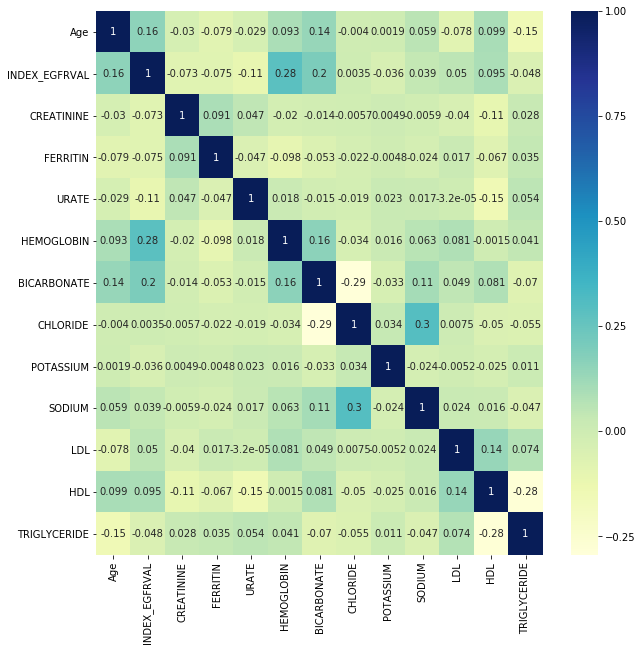

In [0]:
#Exploring relations Correlation Matrix   numerics 
import matplotlib.pyplot as plt
import seaborn as sns

corr_num = df_corr_num.corr()
#sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.subplots(figsize=(10,10))
sns.heatmap(corr_num,annot = True, cmap="YlGnBu")

In [0]:
#process numerical data into categorical 

In [0]:
#Lab values

# Creatinine normal range 0.5-1.2 as 0, abnormal or null as 1


df.loc[(df['CREATININE'] < 0.5) | (df['CREATININE'] > 1.2) | (df['CREATININE'].isnull()), 'CREATININE']= 1
df.loc[(df['CREATININE'] >= 0.5) & (df['CREATININE'] <= 1.2)& (df['CREATININE'] != 1), 'CREATININE']= 0 


# Potassium normal range 3.6-5.2 as 0, abnormal or null as 1

df.loc[(df['POTASSIUM'] < 3.5) | (df['POTASSIUM'] > 5.2) | (df['POTASSIUM'].isnull()), 'POTASSIUM']= 1
df.loc[(df['POTASSIUM'] >= 3.5) & (df['POTASSIUM'] <= 5.2), 'POTASSIUM']= 0 


# FERRITIN 12-300
df.loc[(df['FERRITIN'] < 12) | (df['FERRITIN'] > 300) | (df['FERRITIN'].isnull()), 'FERRITIN']= 1
df.loc[(df['FERRITIN'] >= 12) & (df['FERRITIN'] <= 300), 'FERRITIN']= 0 


# URATE 2.4-7.0
df.loc[(df['URATE'] < 2.4) | (df['URATE'] > 7.0) | (df['URATE'].isnull()), 'URATE']= 1
df.loc[(df['URATE'] >= 2.4) & (df['URATE'] <= 7.0), 'URATE']= 0 


# HEMOGLOBIN 12.0-17.5
df.loc[(df['HEMOGLOBIN'] < 12) | (df['HEMOGLOBIN'] > 17.5) | (df['HEMOGLOBIN'].isnull()), 'HEMOGLOBIN']= 1
df.loc[(df['HEMOGLOBIN'] >= 12) & (df['HEMOGLOBIN'] <= 17.5), 'HEMOGLOBIN']= 0 


# BICARBONATE 23-30
df.loc[(df['BICARBONATE'] < 23) | (df['BICARBONATE'] > 30) | (df['BICARBONATE'].isnull()), 'BICARBONATE']= 1
df.loc[(df['BICARBONATE'] >= 23) & (df['BICARBONATE'] <= 30), 'BICARBONATE']= 0 

# CHLORIDE 96-106
df.loc[(df['CHLORIDE'] < 96) | (df['CHLORIDE'] > 106) | (df['CHLORIDE'].isnull()), 'CHLORIDE']= 1
df.loc[(df['CHLORIDE'] >= 96) & (df['CHLORIDE'] <= 106), 'CHLORIDE']= 0 



# SODIUM 135-145
df.loc[(df['SODIUM'] < 135) | (df['SODIUM'] > 145) | (df['SODIUM'].isnull()), 'SODIUM']= 1
df.loc[(df['SODIUM'] >= 135) & (df['SODIUM'] <= 145), 'SODIUM']= 0 


# LDL 100-129
df.loc[(df['LDL'] < 100) | (df['LDL'] > 129) | (df['LDL'].isnull()), 'LDL']= 1
df.loc[(df['LDL'] >= 100) & (df['LDL'] <= 129), 'LDL']= 0 


# HDL 40-59
df.loc[(df['HDL'] < 40) | (df['HDL'] > 59) | (df['HDL'].isnull()), 'HDL']= 1
df.loc[(df['HDL'] >= 40) & (df['HDL'] <= 59), 'HDL']= 0 

# TRIGLYCERIDE <150
df.loc[(df['TRIGLYCERIDE'] <= 0) | (df['TRIGLYCERIDE'] > 150) | (df['TRIGLYCERIDE'].isnull()), 'TRIGLYCERIDE']= 1
df.loc[(df['TRIGLYCERIDE'] > 0) & (df['TRIGLYCERIDE'] <= 150)& (df['TRIGLYCERIDE'] != 1), 'TRIGLYCERIDE']= 0 

In [0]:
# process medical treatment 0: no 1:yes

df.loc[(df['ANTILIPEMIC_AGENTS'].isnull()), 'ANTILIPEMIC_AGENTS']= 0 
        
df.loc[(df['BETA_BLOCKERS'].isnull()), 'BETA_BLOCKERS']= 0 

df.loc[(df['CALCIUM_CHANNEL_BLOCKERS'].isnull()), 'CALCIUM_CHANNEL_BLOCKERS']= 0
        
df.loc[(df['ACE_INHIBITORS'].isnull()), 'ACE_INHIBITORS']= 0

df.loc[(df['ANTI_ARRYTHYMIC'].isnull()), 'ANTI_ARRYTHYMIC']= 0
        
df.loc[(df['DIGITALIS_GLYCOSIDE'].isnull()), 'DIGITALIS_GLYCOSIDE']= 0

df.loc[(df['ANTIGOUT_AGENTS'].isnull()), 'ANTIGOUT_AGENTS']= 0

df.loc[(df['ANTICOAGULANTS'].isnull()), 'ANTICOAGULANTS']= 0

df.loc[(df['HISTAMINE_ANTAGONIST'].isnull()), 'HISTAMINE_ANTAGONIST']= 0
        
df.loc[(df['PPI_INHIBITOR'].isnull()), 'PPI_INHIBITOR']= 0


In [0]:
#missing values percentage

total = df.isnull().sum().sort_values(ascending = False)
percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
CALCIUM,310314,100.00
RENAL_TRANSPLANTHX,306458,98.76
DIALYSIS_DATE,298599,96.22
DEATHDATE,276370,89.06
AGE_AT_DEATH,263923,85.05
LAST_ENCOUNTER_DATE,64645,20.83
Age,41030,13.22
YEAR_OF_BIRTH,41030,13.22
LAST_MEDICATION_DATE,12668,4.08
FIRST_MEDICATION_DATE,12668,4.08


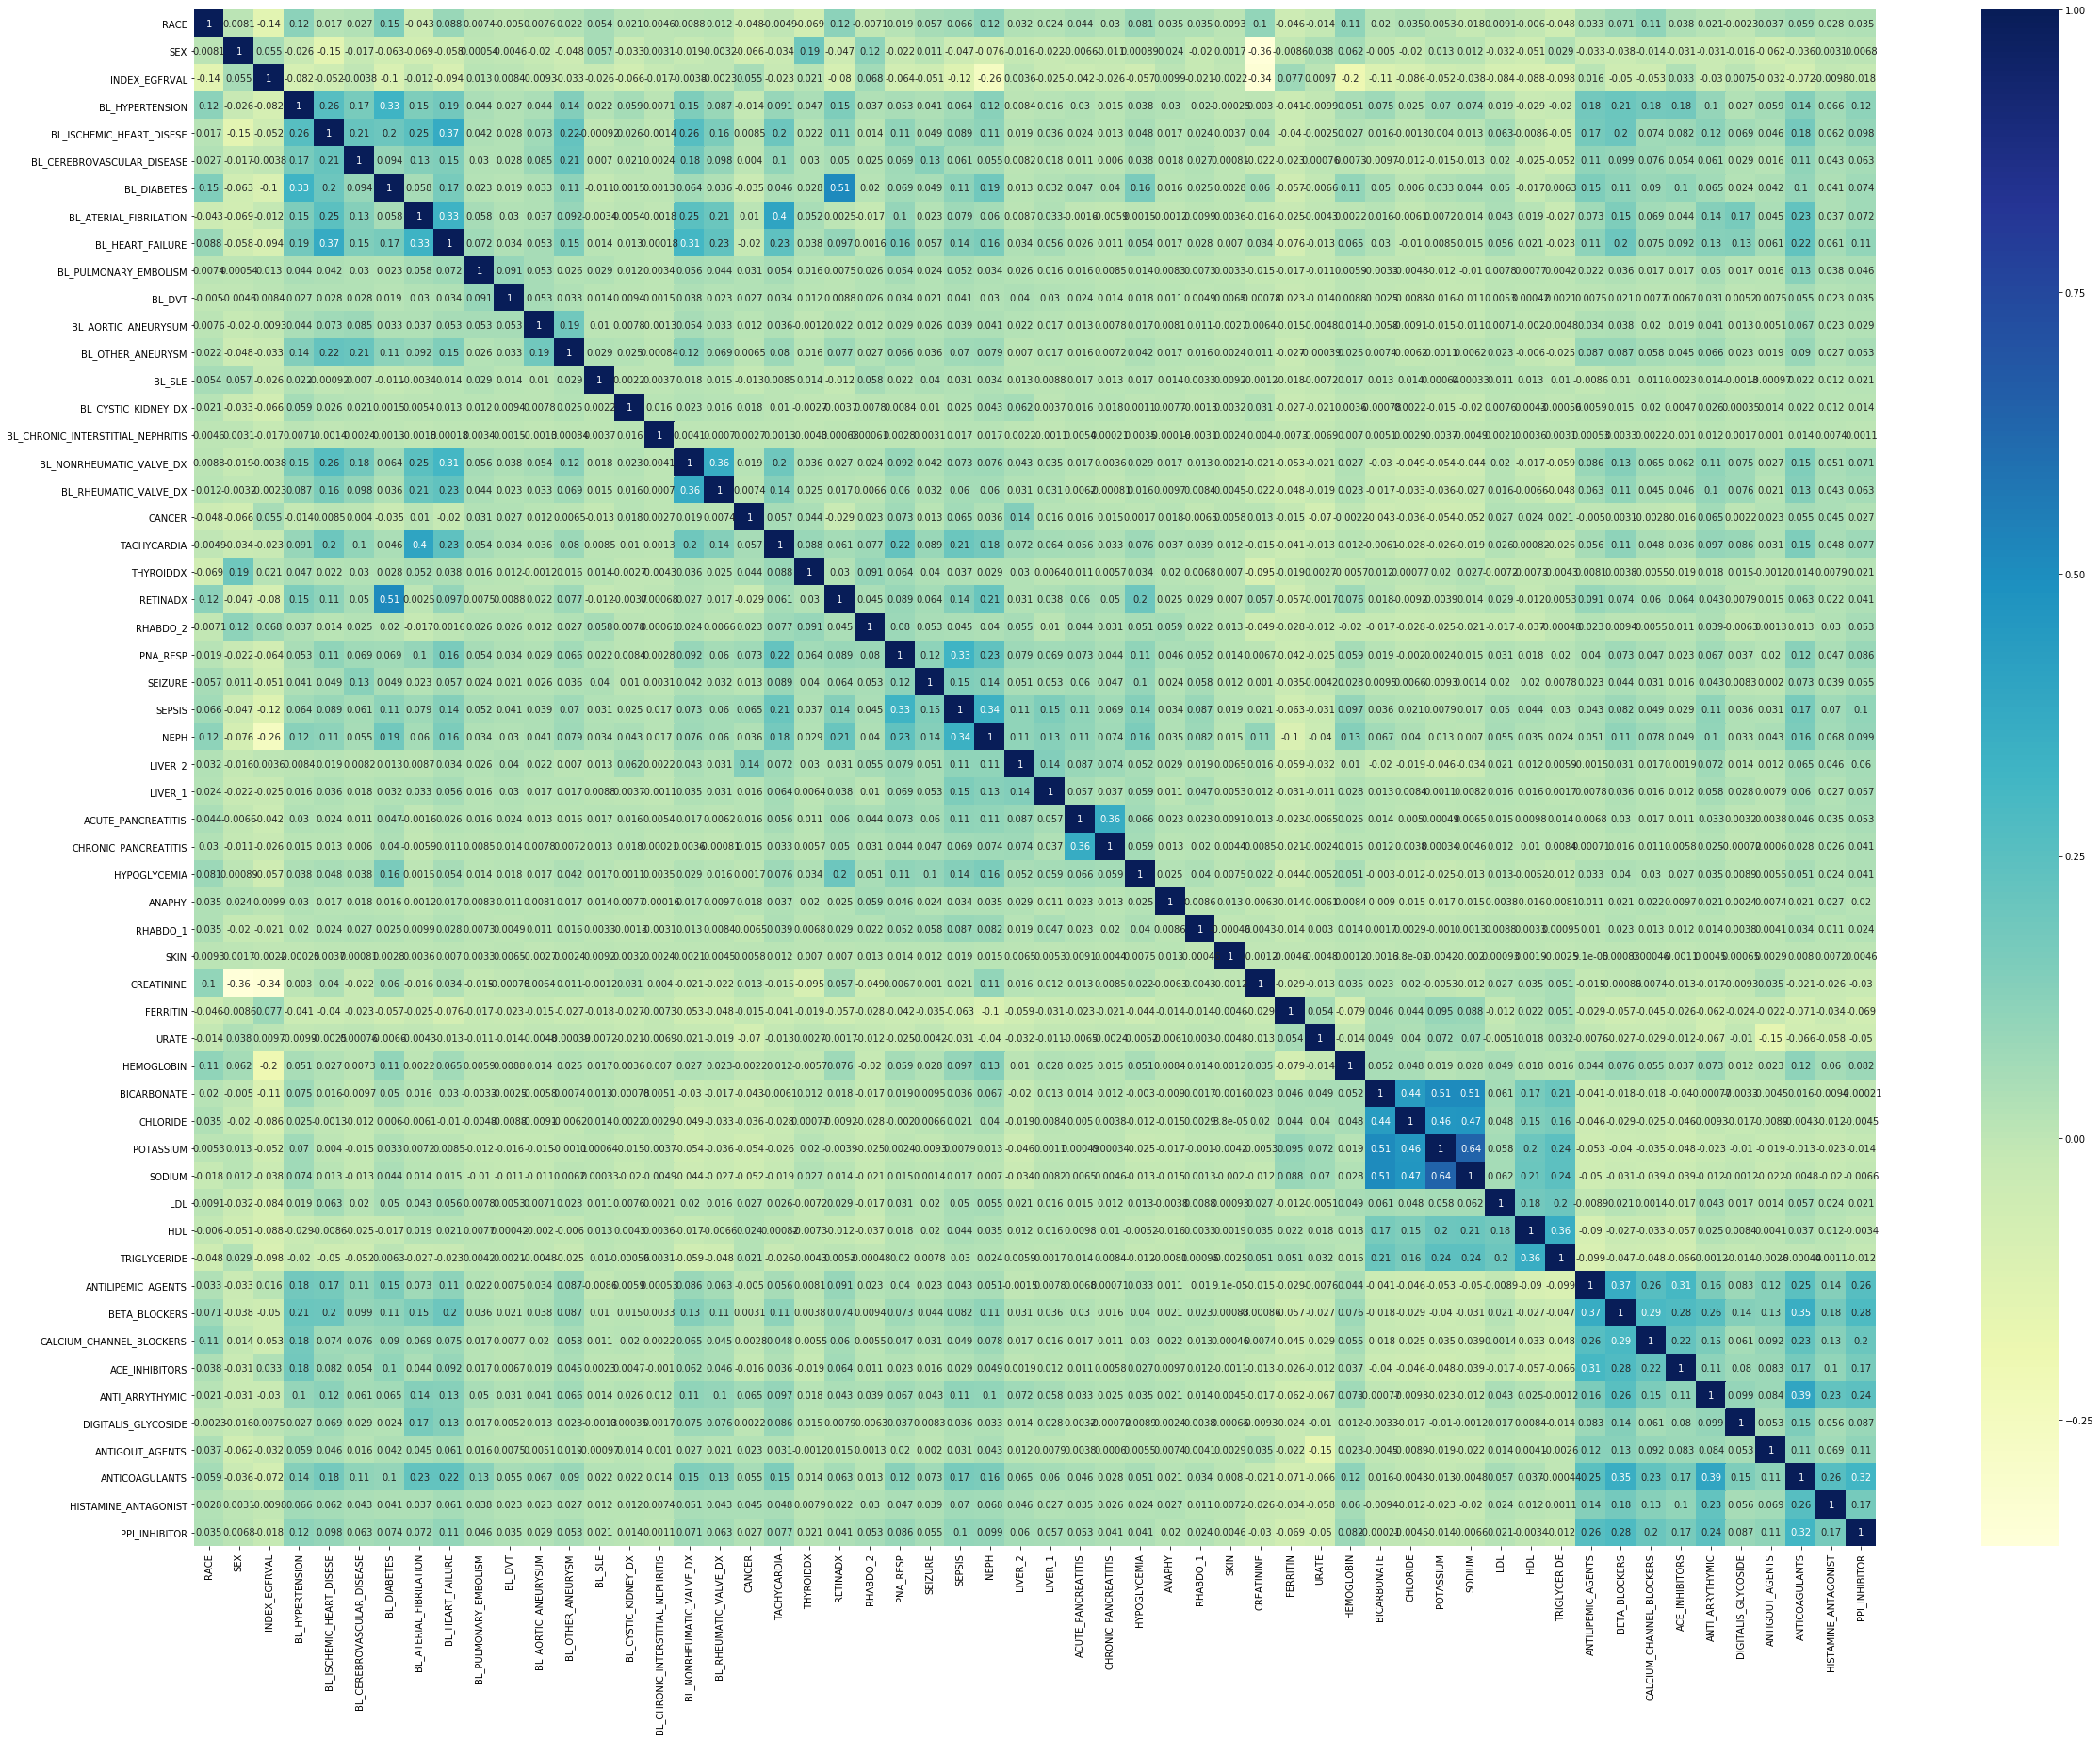

In [0]:

features_category =['RACE', 'SEX', 'INDEX_EGFRVAL', 'BL_HYPERTENSION',
       'BL_ISCHEMIC_HEART_DISESE', 'BL_CEREBROVASCULAR_DISEASE', 'BL_DIABETES',
       'BL_ATERIAL_FIBRILATION', 'BL_HEART_FAILURE', 'BL_PULMONARY_EMBOLISM',
       'BL_DVT', 'BL_AORTIC_ANEURYSUM', 'BL_OTHER_ANEURYSM', 'BL_SLE',
       'BL_CYSTIC_KIDNEY_DX', 'BL_CHRONIC_INTERSTITIAL_NEPHRITIS',
       'BL_NONRHEUMATIC_VALVE_DX', 'BL_RHEUMATIC_VALVE_DX', 'CANCER',
       'TACHYCARDIA', 'THYROIDDX', 'RETINADX', 'RHABDO_2', 'PNA_RESP',
       'SEIZURE', 'SEPSIS', 'NEPH', 'LIVER_2', 'LIVER_1', 'ACUTE_PANCREATITIS',
       'CHRONIC_PANCREATITIS', 'HYPOGLYCEMIA', 'ANAPHY', 'RHABDO_1', 'SKIN',
       'CREATININE', 'FERRITIN', 'URATE', 'HEMOGLOBIN', 'BICARBONATE',
       'CHLORIDE', 'POTASSIUM', 'SODIUM', 'LDL', 'HDL', 'TRIGLYCERIDE',
       'ANTILIPEMIC_AGENTS', 'BETA_BLOCKERS', 'CALCIUM_CHANNEL_BLOCKERS',
       'ACE_INHIBITORS', 'ANTI_ARRYTHYMIC', 'DIGITALIS_GLYCOSIDE',
       'ANTIGOUT_AGENTS', 'ANTICOAGULANTS', 'HISTAMINE_ANTAGONIST',
       'PPI_INHIBITOR']


df_corr_cate = df[features_category]

#Exploring relations Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

corr_cate = df_corr_cate.corr()
#sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.subplots(figsize=(40,30))
sns.heatmap(corr_cate,annot = True, cmap="YlGnBu")

In [0]:
# Plot histogram

df.hist(figsize = (20,18))

In [0]:
#adding eGFR difference

df['egfr_diff'] =  df.YEAR2_EGFR_VALUE - df.INDEX_EGFRVAL

#eGFR changes percentages = (eGFR_diff / 1.5 years_index_eGFR) * 100% 

df['eGFR_diff_per'] = 100 *df.egfr_diff/df.INDEX_EGFRVAL

(0, 61)

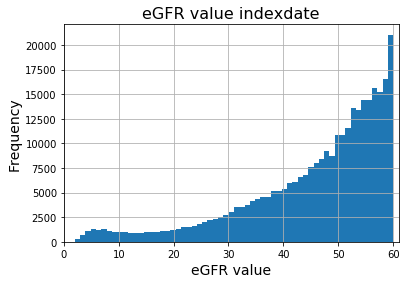

In [0]:
df.INDEX_EGFRVAL.hist(bins=60)

plt.title('eGFR value indexdate',fontsize=16)
plt.xlabel('eGFR value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim([0,61])

(-60, 60)

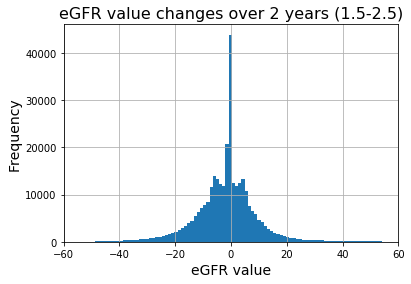

In [0]:
df.egfr_diff.hist(bins=100)

plt.title('eGFR value changes over 2 years (1.5-2.5)',fontsize=16)
plt.xlabel('eGFR value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim([-60,60])

(-100, 100)

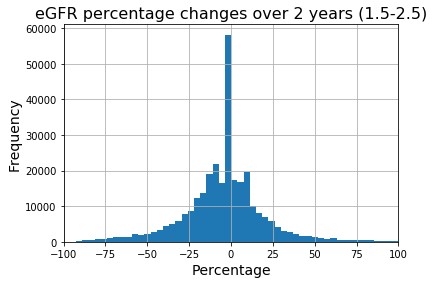

In [0]:

df.eGFR_diff_per.hist(bins =800)

plt.title('eGFR percentage changes over 2 years (1.5-2.5)',fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim([-100,100])

In [0]:
# label fast progressor and slow progressor
# <=-30% :1 , >-30% :0 


df.loc[(df['eGFR_diff_per']<= -30),'label']=1
df.loc[(df['eGFR_diff_per']> -30),'label']=0

In [0]:
all_variables = ['YEAR_OF_BIRTH','AGE_AT_DEATH','DEATHDATE','INDEXDATE','DIALYSIS_DATE',
                 'FIRST_DIAG_DATE', 'LAST_DIAG_DATE','FIRST_PROCEDURE_DATE','LAST_PROCEDURE_DATE',
                 'FIRST_MEDICATION_DATE','LAST_MEDICATION_DATE','FIRST_ENCOUNTER_DATE','LAST_ENCOUNTER_DATE',
                 'FIRST_LAB_DATE','LAST_LAB_DATE',
                 
         'RACE', 'SEX',
        'INDEX_EGFRVAL', 'BL_HYPERTENSION',
       'BL_ISCHEMIC_HEART_DISESE', 'BL_CEREBROVASCULAR_DISEASE', 'BL_DIABETES',
       'BL_ATERIAL_FIBRILATION', 'BL_HEART_FAILURE', 'BL_PULMONARY_EMBOLISM',
       'BL_DVT', 'BL_AORTIC_ANEURYSUM', 'BL_OTHER_ANEURYSM', 'BL_SLE',
       'BL_CYSTIC_KIDNEY_DX', 'BL_CHRONIC_INTERSTITIAL_NEPHRITIS',
       'BL_NONRHEUMATIC_VALVE_DX', 'BL_RHEUMATIC_VALVE_DX', 'CANCER',
       'TACHYCARDIA', 'THYROIDDX', 'RETINADX', 'RHABDO_2', 'PNA_RESP',
       'SEIZURE', 'SEPSIS', 'NEPH', 'LIVER_2', 'LIVER_1', 'ACUTE_PANCREATITIS',
       'CHRONIC_PANCREATITIS', 'HYPOGLYCEMIA', 'ANAPHY', 'RHABDO_1', 'SKIN',
       'CREATININE', 'FERRITIN', 'URATE', 'HEMOGLOBIN', 'BICARBONATE',
       'CHLORIDE', 'POTASSIUM', 'SODIUM', 'LDL', 'HDL', 'TRIGLYCERIDE',
       'ANTILIPEMIC_AGENTS', 'BETA_BLOCKERS', 'CALCIUM_CHANNEL_BLOCKERS',
       'ACE_INHIBITORS', 'ANTI_ARRYTHYMIC', 'DIGITALIS_GLYCOSIDE',
       'ANTIGOUT_AGENTS', 'ANTICOAGULANTS', 'HISTAMINE_ANTAGONIST',
       'PPI_INHIBITOR', 'date_diff', 'diff_2', 'Age', 'egfr_diff',
       'eGFR_diff_per', 'label']


# remove missing Ages values 13.22% still 87.78% data left
#283845


# df_nomissing patients 269284
df_nomiss = df[all_variables].dropna()


In [0]:
df.head()

,PATIENTID,RACE,YEAR_OF_BIRTH,AGE_AT_DEATH,SEX,DEATHDATE,INDEXDATE,INDEX_EGFRVAL,FIRST_EGFR_DATE,DIALYSIS_DATE,FIRST_DIAG_DATE,LAST_DIAG_DATE,FIRST_PROCEDURE_DATE,LAST_PROCEDURE_DATE,FIRST_MEDICATION_DATE,LAST_MEDICATION_DATE,FIRST_ENCOUNTER_DATE,LAST_ENCOUNTER_DATE,FIRST_LAB_DATE,LAST_LAB_DATE,RENAL_TRANSPLANTHX,YEAR2_EGFR_VALUE,YEAR2_EGFR_DATE,BL_HYPERTENSION,BL_ISCHEMIC_HEART_DISESE,BL_CEREBROVASCULAR_DISEASE,BL_DIABETES,BL_ATERIAL_FIBRILATION,BL_HEART_FAILURE,BL_PULMONARY_EMBOLISM,BL_DVT,BL_AORTIC_ANEURYSUM,BL_OTHER_ANEURYSM,BL_SLE,BL_CYSTIC_KIDNEY_DX,BL_CHRONIC_INTERSTITIAL_NEPHRITIS,BL_NONRHEUMATIC_VALVE_DX,BL_RHEUMATIC_VALVE_DX,CANCER,TACHYCARDIA,...,SEIZURE,SEPSIS,NEPH,LIVER_2,LIVER_1,ACUTE_PANCREATITIS,CHRONIC_PANCREATITIS,HYPOGLYCEMIA,ANAPHY,RHABDO_1,SKIN,CREATININE,FERRITIN,URATE,HEMOGLOBIN,BICARBONATE,CHLORIDE,POTASSIUM,SODIUM,CALCIUM,LDL,HDL,TRIGLYCERIDE,ANTILIPEMIC_AGENTS,BETA_BLOCKERS,CALCIUM_CHANNEL_BLOCKERS,ACE_INHIBITORS,ANTI_ARRYTHYMIC,DIGITALIS_GLYCOSIDE,ANTIGOUT_AGENTS,ANTICOAGULANTS,HISTAMINE_ANTAGONIST,PPI_INHIBITOR,max_date,date_diff,diff_2,Age,egfr_diff,eGFR_diff_per,label
0,000e638f1643e0834511ae7d3d41bb29fe9fcd51,0,1938.0,NaN,0,NaN,2012,59.212383,2012-01-23,NaN,2011-02-10,2018-09-11,2011-02-10,2018-03-29,2014-07-22,2019-02-28,2011-02-10,NaT,2011-05-12,2018-09-11,NaN,58.386310,2014-05-06,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-02-28,2495 days,6.0,74.0,-0.826073,-1.395102,0.0
1,004e8dc6cbb659d4cd3836181bbfd9d0783c6bfd,0,1944.0,NaN,0,NaN,2014,46.877400,2014-05-06,NaN,2014-02-04,2018-09-28,2014-02-04,2017-12-27,2014-02-25,2017-12-27,2014-02-04,2017-08-25,2014-02-04,2018-09-28,NaN,28.130526,2016-07-01,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2018-09-28,1473 days,4.0,70.0,-18.746874,-39.991284,1.0
2,00a8ab80f5b1b435a54d3a35f29ba7dc522362ee,0,1932.0,NaN,1,NaN,1996,59.909138,1995-08-29,NaN,1990-01-11,2018-07-26,1990-07-07,2017-11-08,2007-08-03,2018-07-13,1990-01-11,2018-07-26,1994-02-02,2018-07-26,NaN,58.659832,1998-07-10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-26,8189 days,22.0,64.0,-1.249306,-2.085335,0.0
3,00b08e7802eafddb58a8a3ede41decf925e1818e,0,1928.0,NaN,0,NaN,2013,50.104610,2012-01-14,NaN,2010-09-09,2015-04-03,2010-09-09,2014-10-28,2012-01-14,2015-04-09,2010-09-09,2015-04-10,2012-01-14,2015-04-10,NaN,54.425636,2015-04-04,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2015-04-10,787 days,2.0,85.0,4.321026,8.624009,0.0
4,00b81a9f4b7293bef52b0407ee858bd5161ff768,0,NaN,90.0,0,NaN,2010,42.189290,2008-05-03,NaN,1900-01-01,2015-11-27,2010-04-11,2015-11-27,2010-04-11,2015-10-08,2008-05-03,2015-11-27,2008-05-03,2015-11-27,NaN,41.600708,2012-07-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-11-27,2056 days,5.0,NaN,-0.588582,-1.395098,0.0


In [0]:
#missing values percentage

df_see=df[all_variables]

total = df_see.isnull().sum().sort_values(ascending = False)
percent = round(df_see.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])


,Total,Percent
DIALYSIS_DATE,298599,96.22
DEATHDATE,276370,89.06
AGE_AT_DEATH,263923,85.05
LAST_ENCOUNTER_DATE,64645,20.83
YEAR_OF_BIRTH,41030,13.22
Age,41030,13.22
FIRST_MEDICATION_DATE,12668,4.08
LAST_MEDICATION_DATE,12668,4.08
LAST_PROCEDURE_DATE,9277,2.99
FIRST_PROCEDURE_DATE,9277,2.99


In [0]:
# features
features = ['Age','RACE', 'SEX',
        'INDEX_EGFRVAL', 'BL_HYPERTENSION',
       'BL_ISCHEMIC_HEART_DISESE', 'BL_CEREBROVASCULAR_DISEASE', 'BL_DIABETES',
       'BL_ATERIAL_FIBRILATION', 'BL_HEART_FAILURE', 'BL_PULMONARY_EMBOLISM',
       'BL_DVT', 'BL_AORTIC_ANEURYSUM', 'BL_OTHER_ANEURYSM', 'BL_SLE',
       'BL_CYSTIC_KIDNEY_DX', 'BL_CHRONIC_INTERSTITIAL_NEPHRITIS',
       'BL_NONRHEUMATIC_VALVE_DX', 'BL_RHEUMATIC_VALVE_DX', 'CANCER',
       'TACHYCARDIA', 'THYROIDDX', 'RETINADX', 'RHABDO_2', 'PNA_RESP',
       'SEIZURE', 'SEPSIS', 'NEPH', 'LIVER_2', 'LIVER_1', 'ACUTE_PANCREATITIS',
       'CHRONIC_PANCREATITIS', 'HYPOGLYCEMIA', 'ANAPHY', 'RHABDO_1', 'SKIN',
       'CREATININE', 'FERRITIN', 'URATE', 'HEMOGLOBIN', 'BICARBONATE',
       'CHLORIDE', 'POTASSIUM', 'SODIUM', 'LDL', 'HDL', 'TRIGLYCERIDE',
       'ANTILIPEMIC_AGENTS', 'BETA_BLOCKERS', 'CALCIUM_CHANNEL_BLOCKERS',
       'ACE_INHIBITORS', 'ANTI_ARRYTHYMIC', 'DIGITALIS_GLYCOSIDE',
       'ANTIGOUT_AGENTS', 'ANTICOAGULANTS', 'HISTAMINE_ANTAGONIST',
       'PPI_INHIBITOR']

df_final =df_nomiss[['Age','RACE', 'SEX',
        'INDEX_EGFRVAL', 'BL_HYPERTENSION',
       'BL_ISCHEMIC_HEART_DISESE', 'BL_CEREBROVASCULAR_DISEASE', 'BL_DIABETES',
       'BL_ATERIAL_FIBRILATION', 'BL_HEART_FAILURE', 'BL_PULMONARY_EMBOLISM',
       'BL_DVT', 'BL_AORTIC_ANEURYSUM', 'BL_OTHER_ANEURYSM', 'BL_SLE',
       'BL_CYSTIC_KIDNEY_DX', 'BL_CHRONIC_INTERSTITIAL_NEPHRITIS',
       'BL_NONRHEUMATIC_VALVE_DX', 'BL_RHEUMATIC_VALVE_DX', 'CANCER',
       'TACHYCARDIA', 'THYROIDDX', 'RETINADX', 'RHABDO_2', 'PNA_RESP',
       'SEIZURE', 'SEPSIS', 'NEPH', 'LIVER_2', 'LIVER_1', 'ACUTE_PANCREATITIS',
       'CHRONIC_PANCREATITIS', 'HYPOGLYCEMIA', 'ANAPHY', 'RHABDO_1', 'SKIN',
       'CREATININE', 'FERRITIN', 'URATE', 'HEMOGLOBIN', 'BICARBONATE',
       'CHLORIDE', 'POTASSIUM', 'SODIUM', 'LDL', 'HDL', 'TRIGLYCERIDE',
       'ANTILIPEMIC_AGENTS', 'BETA_BLOCKERS', 'CALCIUM_CHANNEL_BLOCKERS',
       'ACE_INHIBITORS', 'ANTI_ARRYTHYMIC', 'DIGITALIS_GLYCOSIDE',
       'ANTIGOUT_AGENTS', 'ANTICOAGULANTS', 'HISTAMINE_ANTAGONIST',
       'PPI_INHIBITOR','label']]

## Final table is here

Total Patients 269284

Fast progressor   30813 (11.44%) , Slow progressor  238471 (88.56%).

Slow to Fast around 7.7 times.

In [0]:
df_final.head()

,Age,RACE,SEX,INDEX_EGFRVAL,BL_HYPERTENSION,BL_ISCHEMIC_HEART_DISESE,BL_CEREBROVASCULAR_DISEASE,BL_DIABETES,BL_ATERIAL_FIBRILATION,BL_HEART_FAILURE,BL_PULMONARY_EMBOLISM,BL_DVT,BL_AORTIC_ANEURYSUM,BL_OTHER_ANEURYSM,BL_SLE,BL_CYSTIC_KIDNEY_DX,BL_CHRONIC_INTERSTITIAL_NEPHRITIS,BL_NONRHEUMATIC_VALVE_DX,BL_RHEUMATIC_VALVE_DX,CANCER,TACHYCARDIA,THYROIDDX,RETINADX,RHABDO_2,PNA_RESP,SEIZURE,SEPSIS,NEPH,LIVER_2,LIVER_1,ACUTE_PANCREATITIS,CHRONIC_PANCREATITIS,HYPOGLYCEMIA,ANAPHY,RHABDO_1,SKIN,CREATININE,FERRITIN,URATE,HEMOGLOBIN,BICARBONATE,CHLORIDE,POTASSIUM,SODIUM,LDL,HDL,TRIGLYCERIDE,ANTILIPEMIC_AGENTS,BETA_BLOCKERS,CALCIUM_CHANNEL_BLOCKERS,ACE_INHIBITORS,ANTI_ARRYTHYMIC,DIGITALIS_GLYCOSIDE,ANTIGOUT_AGENTS,ANTICOAGULANTS,HISTAMINE_ANTAGONIST,PPI_INHIBITOR,label
0,74.0,0,0,59.212383,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,70.0,0,0,46.877400,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,64.0,0,1,59.909138,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85.0,0,0,50.104610,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,73.0,0,1,57.940002,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_final.count()

Age                                  269284
RACE                                 269284
SEX                                  269284
INDEX_EGFRVAL                        269284
BL_HYPERTENSION                      269284
BL_ISCHEMIC_HEART_DISESE             269284
BL_CEREBROVASCULAR_DISEASE           269284
BL_DIABETES                          269284
BL_ATERIAL_FIBRILATION               269284
BL_HEART_FAILURE                     269284
BL_PULMONARY_EMBOLISM                269284
BL_DVT                               269284
BL_AORTIC_ANEURYSUM                  269284
BL_OTHER_ANEURYSM                    269284
BL_SLE                               269284
BL_CYSTIC_KIDNEY_DX                  269284
BL_CHRONIC_INTERSTITIAL_NEPHRITIS    269284
BL_NONRHEUMATIC_VALVE_DX             269284
BL_RHEUMATIC_VALVE_DX                269284
CANCER                               269284
TACHYCARDIA                          269284
THYROIDDX                            269284
RETINADX                        

## Sample size

In [0]:
# Change sample size by frac

# 10% of data   26928 patients  (23731 slow, 3197 fast,  slow to fast 7.4 times)

df_sample = df_final.sample(frac = 1, random_state=666)


In [0]:
# eg. 100% data   269284 patients (30813 slow, 238471 fast,slow to fast 7.7 times)
# eg. 10%  data   26928 patients  (23731 slow, 3197 fast,  slow to fast 7.4 times)

len(df_sample[df_sample['label']==1].Age),len(df_sample[df_sample['label']==0].Age)

(30813, 238471)

## Training and Testing 

Split 80% of all data to training and 20% for testing 

eg. 100% data 

269284 patients 

Training 215427 ( Slow: 190791 Fast: 24636     Slow to fast 7.7 times)            
Testing  53857    ( Slow: 47680 Fast: 6177         Slow to fast 7.7 times)



In [0]:
from sklearn.model_selection import train_test_split

X_sample = df_sample.loc[:,'Age':'PPI_INHIBITOR'].values
y_sample = df_sample.loc[:,'label'].values
splitRatio = 0.8

X_sample_train,X_sample_test,y_sample_train,y_sample_test = train_test_split(X_sample,y_sample,test_size=(1-splitRatio),random_state=1)



In [0]:
#smote oversampling in training 

from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state=42)
X_sample_train_smo,y_sample_train_smo =smo.fit_sample(X_sample_train,y_sample_train)

# Machine Learinng

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

# Random forest

##  Random forest GridSearchCV  (cv=5)


In [0]:
# record running time

import timeit

start = timeit.default_timer()


depth = range(4, 9)
split = [2, 3, 4]
leaf_min = range(1, 5)
estimators = [30,50,200]

grid = {'max_depth': depth,
        'min_samples_split': split,
        'min_samples_leaf': leaf_min,
        'n_estimators':estimators
        }

clf_rf_sample = RandomForestClassifier(random_state=6042018,
                             n_estimators=50,
                             criterion='entropy',
                             max_features=4,
                             )

grid_rf_clf_sample = GridSearchCV(clf_rf_sample, grid, cv=5, n_jobs=-1,scoring='f1')
grid_rf_clf_sample.fit(X_sample_train_smo, y_sample_train_smo)
grid_rf_clf_sample.best_params_
print(grid_rf_clf_sample.best_score_)
print(grid_rf_clf_sample.best_params_)


stop = timeit.default_timer()

print('Time: ', stop - start)


In [0]:
#########    Testing            RF AUC, F1 ,precision, recall
#########
#########
#########


predict_y_rf = grid_rf_clf_sample.predict(X_sample_test)

print(classification_report(y_sample_test,predict_y_rf))

In [0]:
rf_predict_test_proba = grid_rf_clf_sample.predict_proba(X_sample_test)

rf_false_positive_rate, rf_true_positive_rate, thresholds = metrics.roc_curve(y_sample_test, rf_predict_test_proba[:,1])
rf_roc_auc = metrics.auc(rf_false_positive_rate, rf_true_positive_rate)

plt.title('Random Forest ROC Curve')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, 'b',
label='AUC = %0.2f'% rf_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
#Confusion Matrix 

pd.crosstab(y_sample_test, predict_y_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0.0,2250,111,2361
1.0,282,50,332
All,2532,161,2693


## Random forest by best hyperparameters

In [0]:
#important features rf and best hyparameters

In [0]:
best_clf_rf_sample = RandomForestClassifier(
                            max_depth= 8, 
                            min_samples_leaf= 2, 
                            min_samples_split= 2,
                            random_state=6042018,
                             n_estimators=200,
                             criterion='entropy',
                             max_features=4,
                             )

best_clf_rf_sample.fit(X_sample_train_smo, y_sample_train_smo)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=6042018,
                       verbose=0, warm_start=False)

In [0]:
#Confusion Matrix 
b_predict_y_rf = best_clf_rf_sample.predict(X_sample_test)
pd.crosstab(y_sample_test, b_predict_y_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0.0,42803,4877,47680
1.0,4260,1917,6177
All,47063,6794,53857


In [0]:
#########    Testing            RF AUC, F1 ,precision, recall
#########
#########
#########


predict_y_rf = best_clf_rf_sample.predict(X_sample_test)

print(classification_report(y_sample_test,predict_y_rf))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90     47680
         1.0       0.28      0.31      0.30      6177

    accuracy                           0.83     53857
   macro avg       0.60      0.60      0.60     53857
weighted avg       0.84      0.83      0.83     53857



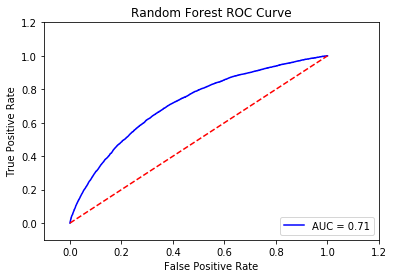

In [0]:
rf_predict_test_proba = best_clf_rf_sample.predict_proba(X_sample_test)

rf_false_positive_rate, rf_true_positive_rate, thresholds = metrics.roc_curve(y_sample_test, rf_predict_test_proba[:,1])
rf_roc_auc = metrics.auc(rf_false_positive_rate, rf_true_positive_rate)

plt.title('Random Forest ROC Curve')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, 'b',
label='AUC = %0.2f'% rf_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
# Top 15 features

a =[] 
for feature in zip(features, best_clf_rf_sample.feature_importances_):
    a.append(feature)
    
rf_impfeas =sorted(a, key=lambda x: x[1],reverse = True)

rf_top15 = []
for i in range(0,16):
    rf_top15.append(rf_impfeas[i][0])
    
rf_top15

['NEPH',
 'HEMOGLOBIN',
 'BL_DIABETES',
 'RACE',
 'SEPSIS',
 'RETINADX',
 'TRIGLYCERIDE',
 'PNA_RESP',
 'THYROIDDX',
 'RHABDO_2',
 'HDL',
 'CANCER',
 'LDL',
 'TACHYCARDIA',
 'BL_HYPERTENSION',
 'CHLORIDE']

# Gridient boosting 

## Gridient boosting  GridSearchCV (cv=5)

In [0]:
# record running time

import timeit

start = timeit.default_timer()



parameters = {
        "learning_rate": [0.001,0.05, 0.2],
        "max_depth": range(2,4),
        "min_samples_split": [2, 4],
        "min_samples_leaf": range(1, 4),
        "n_estimators":[200,5000], 
        
        
        }


grid_gb_clf_sample = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,scoring='roc_auc')
grid_gb_clf_sample.fit(X_sample_train_smo, y_sample_train_smo)

grid_gb_clf_sample.best_params_
print(grid_gb_clf_sample.best_score_)
print(grid_gb_clf_sample.best_params_)



stop = timeit.default_timer()

print('Time: ', stop - start)

KeyboardInterrupt: ignored

In [0]:
#########    Testing            GB AUC, F1 ,precision, recall
#########
#########
#########

predict_y_gb = grid_gb_clf_sample.predict(X_sample_test)

print(classification_report(y_sample_test,predict_y_gb))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      2573
         1.0       0.36      0.03      0.06       266

   micro avg       0.90      0.90      0.90      2839
   macro avg       0.63      0.51      0.51      2839
weighted avg       0.86      0.90      0.87      2839



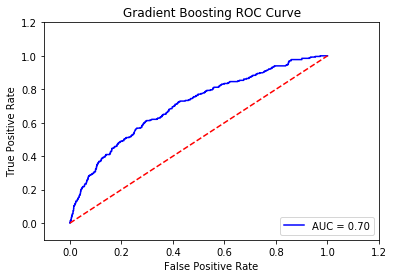

In [0]:
from sklearn import metrics

gb_predict_test_proba = grid_gb_clf_sample.predict_proba(X_sample_test)
gb_false_positive_rate, gb_true_positive_rate, thresholds = metrics.roc_curve(y_sample_test, gb_predict_test_proba[:,1])
gb_roc_auc = metrics.auc(gb_false_positive_rate, gb_true_positive_rate)

plt.title('Gradient Boosting ROC Curve')
plt.plot(gb_false_positive_rate, gb_true_positive_rate, 'b',
label='AUC = %0.2f'% gb_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
#Confusion Matrix gb

pd.crosstab(y_sample_test, predict_y_gb, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0.0,2557,16,2573
1.0,257,9,266
All,2814,25,2839


## Grident Boosting by best hyperparameters

In [0]:
best_clf_gb_sample = GradientBoostingClassifier(
                                        learning_rate= 0.2,
                                        max_depth= 3, 
                                        min_samples_leaf= 2,
                                        min_samples_split= 2, 
                                        n_estimators= 200)


best_clf_gb_sample.fit(X_sample_train_smo, y_sample_train_smo)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predict_y_gb2 = best_clf_gb_sample.predict(X_sample_test)

pd.crosstab(y_sample_test, predict_y_gb2, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0.0,47412,268,47680
1.0,5859,318,6177
All,53271,586,53857


In [0]:
# Top 15 important features

b =[] 

for feature in zip(features, best_clf_gb_sample.feature_importances_):
    b.append(feature)
    
gb_impfeas = sorted(b, key=lambda x: x[1],reverse = True)

gb_top15 = []
for i in range(0,16):
    gb_top15.append(gb_impfeas[i][0])
    
gb_top15

['NEPH',
 'HEMOGLOBIN',
 'BL_DIABETES',
 'RHABDO_2',
 'THYROIDDX',
 'TACHYCARDIA',
 'RACE',
 'PNA_RESP',
 'CANCER',
 'HDL',
 'BL_HYPERTENSION',
 'BL_HEART_FAILURE',
 'SEPSIS',
 'TRIGLYCERIDE',
 'CHLORIDE',
 'LDL']

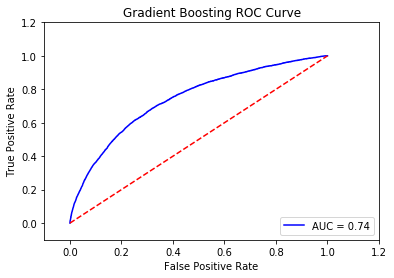

In [0]:
from sklearn import metrics

gb_predict_test_proba = best_clf_gb_sample.predict_proba(X_sample_test)
gb_false_positive_rate, gb_true_positive_rate, thresholds = metrics.roc_curve(y_sample_test, gb_predict_test_proba[:,1])
gb_roc_auc = metrics.auc(gb_false_positive_rate, gb_true_positive_rate)

plt.title('Gradient Boosting ROC Curve')
plt.plot(gb_false_positive_rate, gb_true_positive_rate, 'b',
label='AUC = %0.2f'% gb_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
#########    Testing            GB AUC, F1 ,precision, recall
#########
#########
#########

predict_y_gb = best_clf_gb_sample.predict(X_sample_test)

print(classification_report(y_sample_test,predict_y_gb))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     47680
         1.0       0.54      0.05      0.09      6177

    accuracy                           0.89     53857
   macro avg       0.72      0.52      0.52     53857
weighted avg       0.85      0.89      0.84     53857



In [0]:
threshold = 0.2

gb_predicted_proba = best_clf_gb_sample.predict_proba(X_sample_test)
gb_predicted = (gb_predicted_proba [:,1] >= threshold).astype('int')

print(classification_report(y_sample_test,gb_predicted))

NameError: ignored

# Logistic Regression

## Logistic regression analysis (Odds Ratios)

In [0]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tools import add_constant as add_constant


CKD_df_sample_constant = add_constant(df_sample)
CKD_df_sample_constant.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Age,RACE,SEX,INDEX_EGFRVAL,BL_HYPERTENSION,BL_ISCHEMIC_HEART_DISESE,BL_CEREBROVASCULAR_DISEASE,BL_DIABETES,BL_ATERIAL_FIBRILATION,BL_HEART_FAILURE,BL_PULMONARY_EMBOLISM,BL_DVT,BL_AORTIC_ANEURYSUM,BL_OTHER_ANEURYSM,BL_SLE,BL_CYSTIC_KIDNEY_DX,BL_CHRONIC_INTERSTITIAL_NEPHRITIS,BL_NONRHEUMATIC_VALVE_DX,BL_RHEUMATIC_VALVE_DX,CANCER,TACHYCARDIA,THYROIDDX,RETINADX,RHABDO_2,PNA_RESP,SEIZURE,SEPSIS,NEPH,LIVER_2,LIVER_1,ACUTE_PANCREATITIS,CHRONIC_PANCREATITIS,HYPOGLYCEMIA,ANAPHY,RHABDO_1,SKIN,CREATININE,FERRITIN,URATE,HEMOGLOBIN,BICARBONATE,CHLORIDE,POTASSIUM,SODIUM,LDL,HDL,TRIGLYCERIDE,ANTILIPEMIC_AGENTS,BETA_BLOCKERS,CALCIUM_CHANNEL_BLOCKERS,ACE_INHIBITORS,ANTI_ARRYTHYMIC,DIGITALIS_GLYCOSIDE,ANTIGOUT_AGENTS,ANTICOAGULANTS,HISTAMINE_ANTAGONIST,PPI_INHIBITOR,label
290616,1.0,66.0,0,0,34.013725,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
91411,1.0,66.0,0,1,26.846050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243854,1.0,72.0,0,1,56.238834,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
31039,1.0,59.0,0,0,51.904064,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
305930,1.0,73.0,0,0,54.511322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=CKD_df_sample_constant.columns[:-1]
model=sm.Logit(df_sample.label,CKD_df_sample_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.324032
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:               269284
Model:                          Logit   Df Residuals:                   269226
Method:                           MLE   Df Model:                           57
Date:                Mon, 29 Jul 2019   Pseudo R-squ.:                 0.08895
Time:                        11:05:56   Log-Likelihood:                -87257.
converged:                       True   LL-Null:                       -95776.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.0092      0.065    -31.064      0.000      -2.136      -1.882
Age                                  -0.0158      0.001    -28.666      0.000      -0.017      -0.015
RACE                                  0.3423      0.016     21.681      0.000       0.311       0.373
SEX                                  -0.0284      0.014     -1.991      0.046      -0.056      -0.000
INDEX_EGFRVAL                        -0.0024      0.000     -4.871      0.000      -0.003      -0.001
BL_HYPERTENSION                       0.0383      0.017      2.270      0.023       0.005       0.071
BL_ISCHEMIC_HEART_DISESE             -0.0022      0.016     -0.135      0.893      -0.034       0.030
BL_CEREBROVASCULAR_DISEASE           -0.0104      0.020     -0.528      0.597      -0.049       0.028
BL_DIABETES                           0.3365      0.016     21.127      0.000       0.305       0.368
BL_ATERIAL_FIBRILATION               -0.0009      0.022     -0.042      0.967      -0.043       0.041
BL_HEART_FAILURE                      0.3102      0.018     17.102      0.000       0.275       0.346
BL_PULMONARY_EMBOLISM                -0.2448      0.045     -5.390      0.000      -0.334      -0.156
BL_DVT                               -0.1599      0.056     -2.872      0.004      -0.269      -0.051
BL_AORTIC_ANEURYSUM                  -0.1064      0.059     -1.803      0.071      -0.222       0.009
BL_OTHER_ANEURYSM                     0.0796      0.023      3.529      0.000       0.035       0.124
BL_SLE                                0.0484      0.054      0.891      0.373      -0.058       0.155
BL_CYSTIC_KIDNEY_DX                   0.2129      0.039      5.491      0.000       0.137       0.289
BL_CHRONIC_INTERSTITIAL_NEPHRITIS     0.0455      0.185      0.246      0.806      -0.317       0.408
BL_NONRHEUMATIC_VALVE_DX             -0.0556      0.021     -2.622      0.009      -0.097      -0.014
BL_RHEUMATIC_VALVE_DX                 0.0062      0.032      0.193      0.847      -0.056       0.068
CANCER                               -0.0068      0.015     -0.462      0.644      -0.035       0.022
TACHYCARDIA                           0.0602      0.014      4.169      0.000       0.032       0.089
THYROIDDX                            -0.0677      0.014     -4.919      0.000      -0.095      -0.041
RETINADX                              0.1324      0.016      8.086      0.000       0.100       0.164
RHABDO_2                             -0.2525      0.018    -13.814      0.000      -0.288      -0.217
PNA_RESP                              0.1487      0.015     10.045      0.000       0.120       0.178
SEIZURE                               0.0357      0.021      1.731      0.083      -0.005       0.076
SEPSIS                                0.1689      0.016     10.236      0.000       0.137       0.201
NEPH                                  0.7708      0.015     52.809      0.000  

In [0]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(CKD_df_sample_constant,df_sample.label,cols)



In [0]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:               269284
Model:                          Logit   Df Residuals:                   269242
Method:                           MLE   Df Model:                           41
Date:                Mon, 29 Jul 2019   Pseudo R-squ.:                 0.08886
Time:                        11:12:41   Log-Likelihood:                -87265.
converged:                       True   LL-Null:                       -95776.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.9916      0.056    -35.447      0.000      -2.102      -1.881
Age                         -0.0159      0.001    -29.904      0.000      -0.017      -0.015
RACE                         0.3410      0.016     21.768      0.000       0.310       0.372
INDEX_EGFRVAL               -0.0023      0.000     -4.821      0.000      -0.003      -0.001
BL_HYPERTENSION              0.0383      0.017      2.290      0.022       0.006       0.071
BL_DIABETES                  0.3361      0.016     21.186      0.000       0.305       0.367
BL_HEART_FAILURE             0.3111      0.017     18.238      0.000       0.278       0.345
BL_PULMONARY_EMBOLISM       -0.2482      0.045     -5.489      0.000      -0.337      -0.160
BL_DVT                      -0.1645      0.056     -2.958      0.003      -0.273      -0.056
BL_OTHER_ANEURYSM            0.0728      0.022      3.346      0.001       0.030       0.116
BL_CYSTIC_KIDNEY_DX          0.2122      0.039      5.478      0.000       0.136       0.288
BL_NONRHEUMATIC_VALVE_DX    -0.0557      0.020     -2.785      0.005      -0.095      -0.017
TACHYCARDIA                  0.0613      0.014      4.466      0.000       0.034       0.088
THYROIDDX                   -0.0718      0.014     -5.312      0.000      -0.098      -0.045
RETINADX                     0.1325      0.016      8.107      0.000       0.100       0.164
RHABDO_2                    -0.2554      0.018    -14.087      0.000      -0.291      -0.220
PNA_RESP                     0.1493      0.015     10.116      0.000       0.120       0.178
SEPSIS                       0.1699      0.016     10.370      0.000       0.138       0.202
NEPH                         0.7716      0.015     53.075      0.000       0.743       0.800
LIVER_2                     -0.0467      0.020     -2.313      0.021      -0.086      -0.007
LIVER_1                      0.2300      0.039      5.893      0.000       0.154       0.307
ACUTE_PANCREATITIS           0.0678      0.028      2.392      0.017       0.012       0.123
HYPOGLYCEMIA                 0.1213      0.022      5.403      0.000       0.077       0.165
ANAPHY                      -0.1433      0.039     -3.631      0.000      -0.221      -0.066
CREATININE                   0.0976      0.016      6.210      0.000       0.067       0.128
FERRITIN                    -0.2144      0.021    -10.193      0.000      -0.256      -0.173
HEMOGLOBIN                   0.3050      0.013     22.945      0.000       0.279       0.331
BICARBONATE                  0.0697      0.015      4.545      0.000       0.040       0.100
CHLORIDE                     0.1356      0.015      9.203      0.000       0.107       0.165
POTASSIUM                   -0.0514      0.019     -2.714      0.007      -0.089      -0.014
SODIUM                      -0.1176      0.019     -6.231      0.000      -0.155      -0.081
LDL                          0.1210      0.021      5.688      0.000       0.07

In [0]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                          CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                         0.122250       0.152370    0.136482   0.000
Age                           0.983187       0.985240    0.984213   0.000
RACE                          1.363796       1.450159    1.406315   0.000
INDEX_EGFRVAL                 0.996725       0.998617    0.997670   0.000
BL_HYPERTENSION               1.005537       1.073714    1.039067   0.022
BL_DIABETES                   1.356657       1.443706    1.399505   0.000
BL_HEART_FAILURE              1.320097       1.411397    1.364984   0.000
BL_PULMONARY_EMBOLISM         0.714081       0.852533    0.780242   0.000
BL_DVT                        0.760732       0.946007    0.848327   0.003
BL_OTHER_ANEURYSM             1.030627       1.122450    1.075559   0.001
BL_CYSTIC_KIDNEY_DX           1.146008       1.333943    1.236410   0.000
BL_NONRHEUMATIC_VALVE_DX      0.909399       0.983629    0.945786   0.005
TACHYCARDIA                   1.034965

In [0]:
tt

const                      -0.863518
Age                        -0.015787
RACE                        0.406315
INDEX_EGFRVAL              -0.002330
BL_HYPERTENSION             0.039067
BL_DIABETES                 0.399505
BL_HEART_FAILURE            0.364984
BL_PULMONARY_EMBOLISM      -0.219758
BL_DVT                     -0.151673
BL_OTHER_ANEURYSM           0.075559
BL_CYSTIC_KIDNEY_DX         0.236410
BL_NONRHEUMATIC_VALVE_DX   -0.054214
TACHYCARDIA                 0.063166
THYROIDDX                  -0.069280
RETINADX                    0.141645
RHABDO_2                   -0.225370
PNA_RESP                    0.160974
SEPSIS                      0.185220
NEPH                        1.163211
LIVER_2                    -0.045588
LIVER_1                     0.258647
ACUTE_PANCREATITIS          0.070169
HYPOGLYCEMIA                0.128925
ANAPHY                     -0.133509
CREATININE                  0.102484
FERRITIN                   -0.192991
HEMOGLOBIN                  0.356597
B

In [0]:
tt =conf['Odds Ratio'] -1   

sorted(abs(tt.values))      
      


#.sort_values(ascending=False)

[0.0023295392556758054,
 0.015786631570146925,
 0.039066547724772915,
 0.045588002442693565,
 0.0459930595311302,
 0.0500995879560745,
 0.054213916618478186,
 0.05864056171352172,
 0.06316585140552133,
 0.06928014693269258,
 0.07016880921974988,
 0.07104727200156125,
 0.07217541928443727,
 0.07555875734936679,
 0.0760042255254032,
 0.10103466473050626,
 0.10248408855011548,
 0.1109640721326478,
 0.1285816626196472,
 0.12892546876321886,
 0.13028585401116766,
 0.13054474730845245,
 0.13350861736171482,
 0.14003651413255858,
 0.14164521996535662,
 0.1452565143269986,
 0.15167335641674573,
 0.1609742408342527,
 0.18522025776080042,
 0.18569626861318,
 0.19299100388501433,
 0.21975804106767982,
 0.22537045141418055,
 0.23640985546426685,
 0.24133558158475776,
 0.25864686555692096,
 0.3565965616499742,
 0.3649838552817608,
 0.3995047758531327,
 0.4063146921693086,
 0.8635183039088759,
 1.163211124392812]

## Logistic regression classifier GridSearchCV (cv=5)

In [0]:
from sklearn.linear_model import LogisticRegression


grid={"C":np.logspace(-3,3,7), "penalty":["l1"]}

logreg=LogisticRegression(random_state=600)

grid_logit_clf = GridSearchCV(logreg, grid, cv=5, n_jobs=-1,scoring='roc_auc')

grid_logit_clf.fit(X_sample_train_smo,y_sample_train_smo)

grid_logit_clf.best_params_

print(grid_logit_clf.best_score_)
print(grid_logit_clf.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7501636626986653
{'C': 10.0, 'penalty': 'l1'}


In [0]:
from sklearn.metrics import classification_report

predict_y_logit=grid_logit_clf.predict(X_sample_test)

print(classification_report(y_sample_test,predict_y_logit))

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81       472
         1.0       0.26      0.72      0.38        67

    accuracy                           0.71       539
   macro avg       0.60      0.71      0.60       539
weighted avg       0.86      0.71      0.76       539



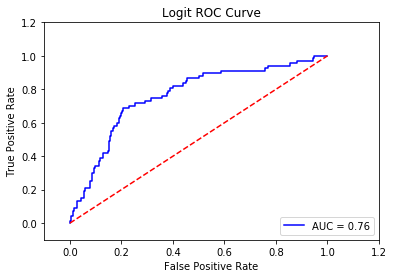

In [0]:
from sklearn import metrics

logit_predict_test_proba = grid_logit_clf.predict_proba(X_sample_test)

logit_false_positive_rate, logit_true_positive_rate, thresholds = metrics.roc_curve(y_sample_test, logit_predict_test_proba[:,1])
logit_roc_auc = metrics.auc(logit_false_positive_rate, logit_true_positive_rate)

plt.title('Logit ROC Curve')
plt.plot(logit_false_positive_rate, logit_true_positive_rate, 'b',
label='AUC = %0.2f'% logit_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
#Confusion Matrix gb

pd.crosstab(y_sample_test, predict_y_logit, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0.0,336,136,472
1.0,19,48,67
All,355,184,539


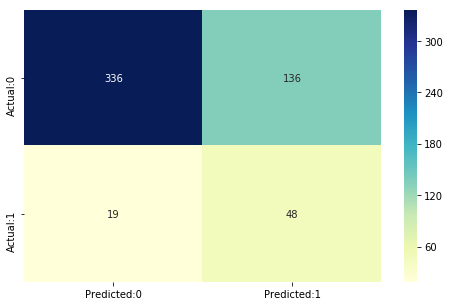

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_sample_test, predict_y_logit)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [0]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [0]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n','\n'

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n','\n'

'Sensitivity or Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n','\n'

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n','\n'

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n','\n'

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN))


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.6875232083178611 
 
The Missclassification = 1-Accuracy =  0.31247679168213893 
 
Sensitivity or Recall or True Positive Rate = TP/(TP+FN) =  0.6586151368760065 
 
Specificity or True Negative Rate = TN/(TN+FP) =  0.6912906610703043 
 
Positive Predictive value = TP/(TP+FP) =  0.2175531914893617 
 
Negative predictive Value = TN/(TN+FN) =  0.939532230462065


In [0]:
#individual level  possibility to become fast CKD progrossor
#threshod defult as 0.5

y_pred_prob=grid_logit_clf.predict_proba(X_sample_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of CKD slow progressor (0)','Prob of CKD fast progressor (1)'])
y_pred_prob_df.head(10)

,Prob of CKD slow progressor (0),Prob of CKD fast progressor (1)
0,0.296677,0.703323
1,0.445533,0.554467
2,0.499681,0.500319
3,0.510773,0.489227
4,0.405791,0.594209
5,0.493043,0.506957
6,0.601286,0.398714
7,0.177122,0.822878
8,0.525018,0.474982
9,0.654308,0.345692


## Logistic Regression (best hyperparameters)

In [0]:
from sklearn.linear_model import LogisticRegression
best_clf_logit_sample = LogisticRegression(C= 0.01, penalty= 'l1')

best_clf_logit_sample.fit(X_sample_train_smo,y_sample_train_smo)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

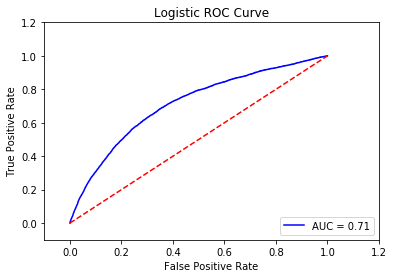

In [0]:
from sklearn import metrics

logit_predict_test_proba = best_clf_logit_sample.predict_proba(X_sample_test)
logit_false_positive_rate, logit_true_positive_rate, thresholds = metrics.roc_curve(y_sample_test, logit_predict_test_proba[:,1])
logit_roc_auc = metrics.auc(logit_false_positive_rate, gb_true_positive_rate)

plt.title('Logistic ROC Curve')
plt.plot(logit_false_positive_rate, logit_true_positive_rate, 'b',
label='AUC = %0.2f'% gb_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
predict_y_logit = best_clf_logit_sample.predict(X_sample_test)

pd.crosstab(y_sample_test, predict_y_logit, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0.0,32991,14689,47680
1.0,2235,3942,6177
All,35226,18631,53857


In [0]:
from sklearn.metrics import classification_report

predict_y_logit=best_clf_logit_sample.predict(X_sample_test)

print(classification_report(y_sample_test,predict_y_logit))

              precision    recall  f1-score   support

         0.0       0.94      0.69      0.80     47680
         1.0       0.21      0.64      0.32      6177

    accuracy                           0.69     53857
   macro avg       0.57      0.67      0.56     53857
weighted avg       0.85      0.69      0.74     53857



# Calibration 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

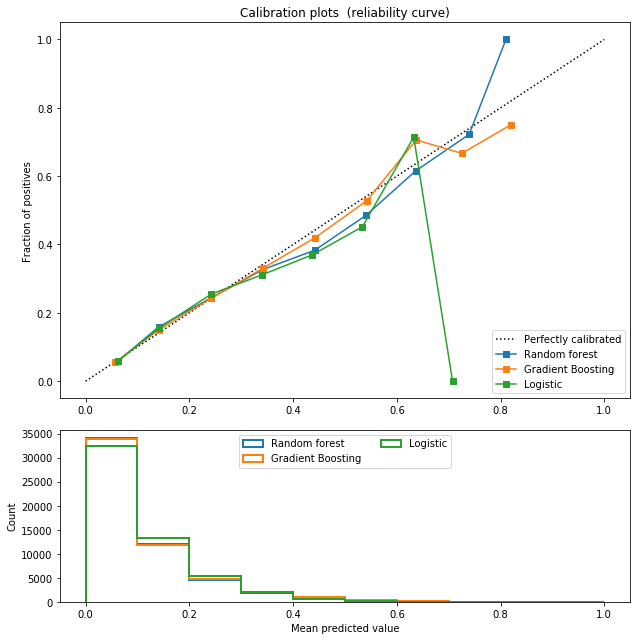

In [0]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
# fit a model

calibrated1 = CalibratedClassifierCV(best_clf_rf_sample, cv=5)
calibrated2 = CalibratedClassifierCV(best_clf_gb_sample, cv=5)
#calibrated3 = CalibratedClassifierCV(best_clf_MLP_sample, cv=5)
calibrated4 = CalibratedClassifierCV(best_clf_logit_sample, cv=5)


# <!-- collapse=True -->
plt.figure(figsize=(9, 9))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(calibrated1, 'Random forest'),
                  (calibrated2, 'Gradient Boosting'),
                  #(calibrated3,'MLP'),
                  (calibrated4,'Logistic')]:
    
    clf.fit(X_sample_train, y_sample_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_sample_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.predict_proba(X_sample_test)[:, 1]
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value =  calibration_curve(y_sample_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))
    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

In [0]:
#df_plot = pd.DataFrame({'top_features':['EGFR_VAL','BI_DIABETES','CREATININE'], 'top_values':[0.20130681309271373,0.1644742321714301,0.15926429748101023]})
#ax = df_plot.plot.bar(x='top_features', y='top_values', rot=0)
